<a href="https://colab.research.google.com/github/RaihanDwiPratama/digital_image_processing/blob/main/praktikum4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

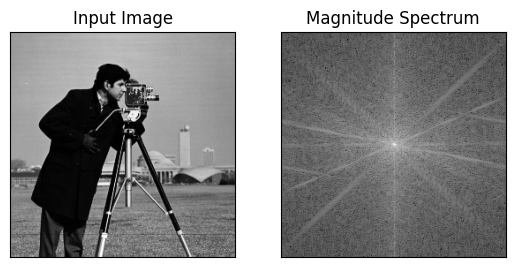

In [7]:
img = cv2.imread('/content/drive/MyDrive/Footage/Footage/camera.tif', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

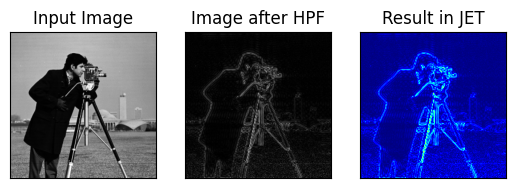

In [8]:
fshift = np.fft.fftshift(np.fft.fft2(img))
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
fshift[crow - 30:crow + 31, ccol - 30:ccol + 31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_back, cmap='gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_back, cmap='jet')
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

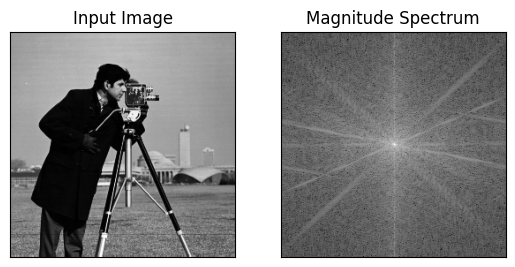

In [10]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

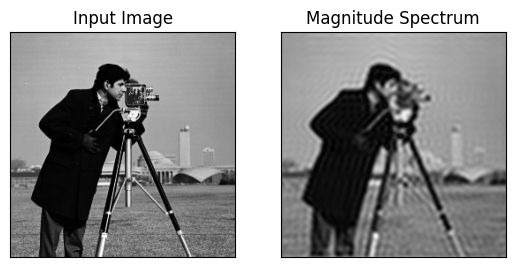

In [11]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
img2 = cv2.imread('/content/drive/MyDrive/Footage/Footage/mervin.jpg', 0)
rows,cols = img2.shape
print(rows,cols)
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
print(nrows,ncols)

640 427
640 432


In [16]:
nimg = np.zeros((nrows,ncols))
nimg[:rows,:cols] = img2
%timeit fft1 = np.fft.fft2(img2)
%timeit fft2 = np.fft.fft2(img2,[nrows,ncols])

15.3 ms ± 3.78 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.78 ms ± 90.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%timeit dft1= cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
%timeit dft2= cv2.dft(np.float32(nimg),flags=cv2.DFT_COMPLEX_OUTPUT)

457 µs ± 6.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.48 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


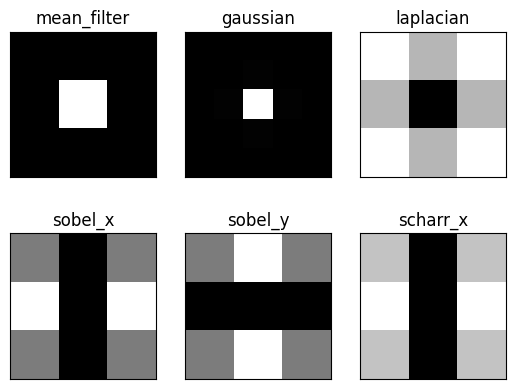

In [18]:
mean_filter = np.ones((3,3))
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T
scharr = np.array([[-3, 0, 3],
[-10,0,10],
[-3, 0, 3]])
sobel_x= np.array([[-1, 0, 1],
[-2, 0, 2],
[-1, 0, 1]])
sobel_y= np.array([[-1,-2,-1],
[0, 0, 0],
[1, 2, 1]])
laplacian=np.array([[0, 1, 0],
[1,-4, 1],
[0, 1, 0]])
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
for i in range(6):
 plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
 plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()

Domain Filter - Cartoonify


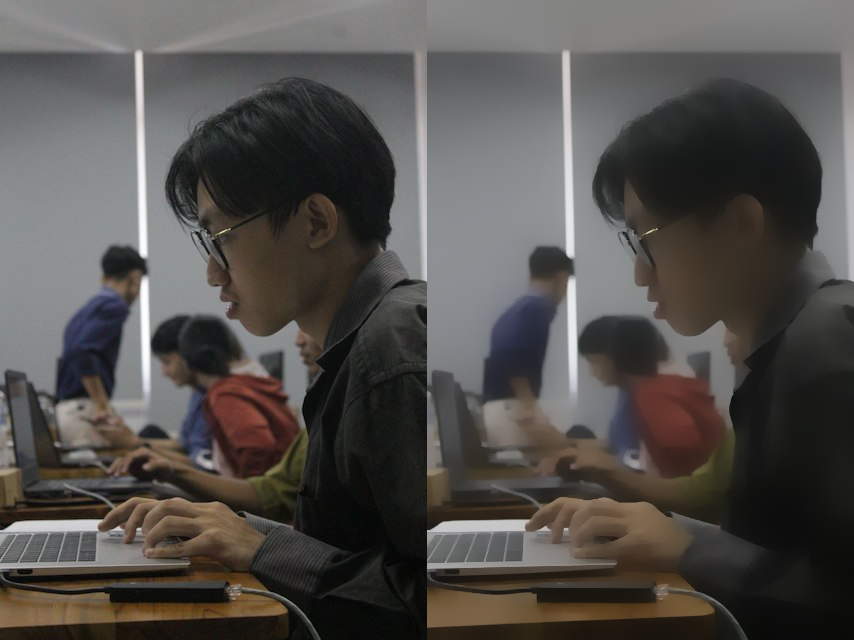

In [19]:
src = cv2.imread('/content/drive/MyDrive/Footage/Footage/mervin.jpg',
cv2.IMREAD_UNCHANGED)
DF = cv2.edgePreservingFilter(src, flags=1, sigma_s=60, sigma_r=0.4)
print("Domain Filter - Cartoonify")
cv2_imshow(np.hstack((src, DF)))

Gaussian Smoothing


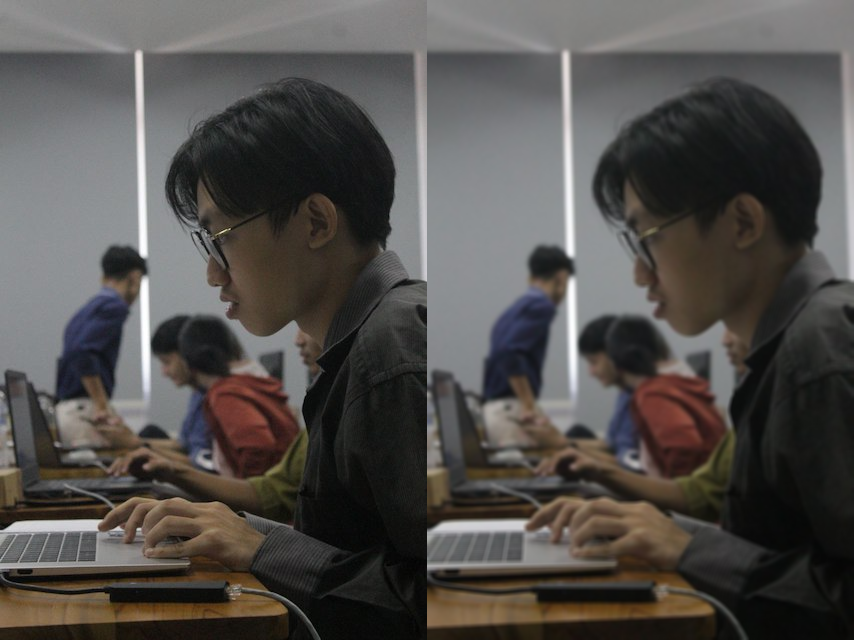

In [20]:
dst = cv2.GaussianBlur(src,(5,5),cv2.BORDER_DEFAULT)
print("Gaussian Smoothing")
cv2_imshow(np.hstack((src, dst)))

Mean Filter


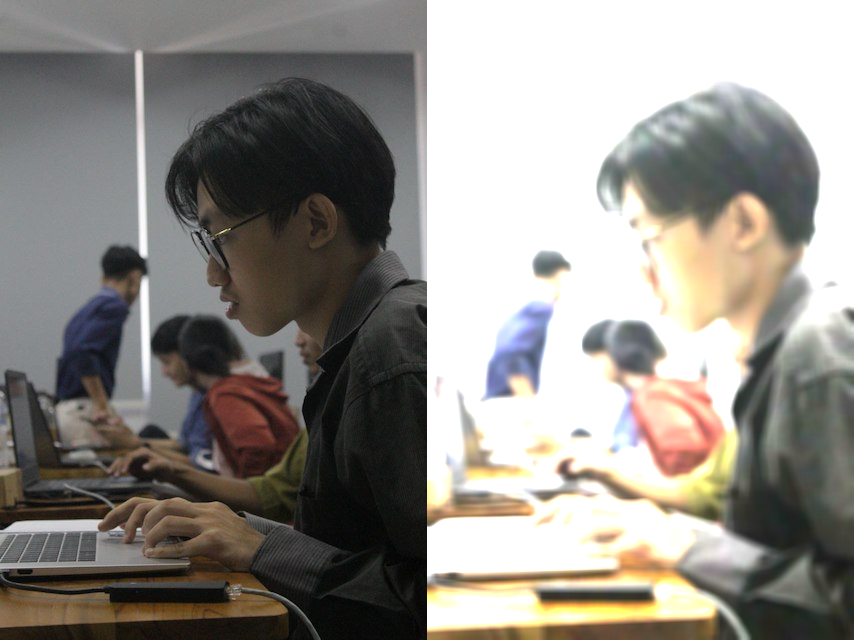

In [21]:
kernel = np.ones((10,10),np.float32)/25
img_mean = cv2.filter2D(src,-1,kernel)
print("Mean Filter")
cv2_imshow(np.hstack((src, img_mean)))

Median Filter


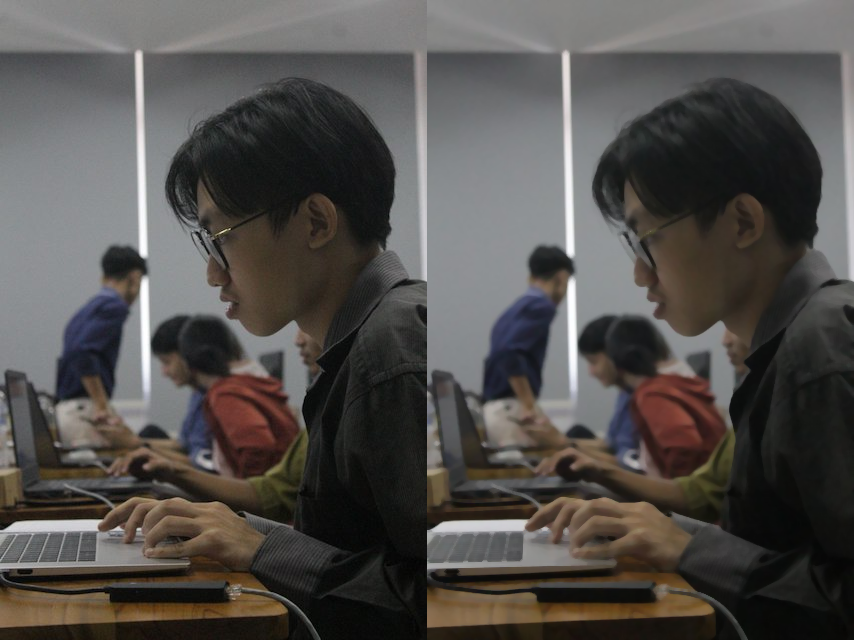

In [22]:
dst3 = cv2.medianBlur(src,5)
print("Median Filter")
cv2_imshow(np.hstack((src, dst3)))

Bilateral Filter


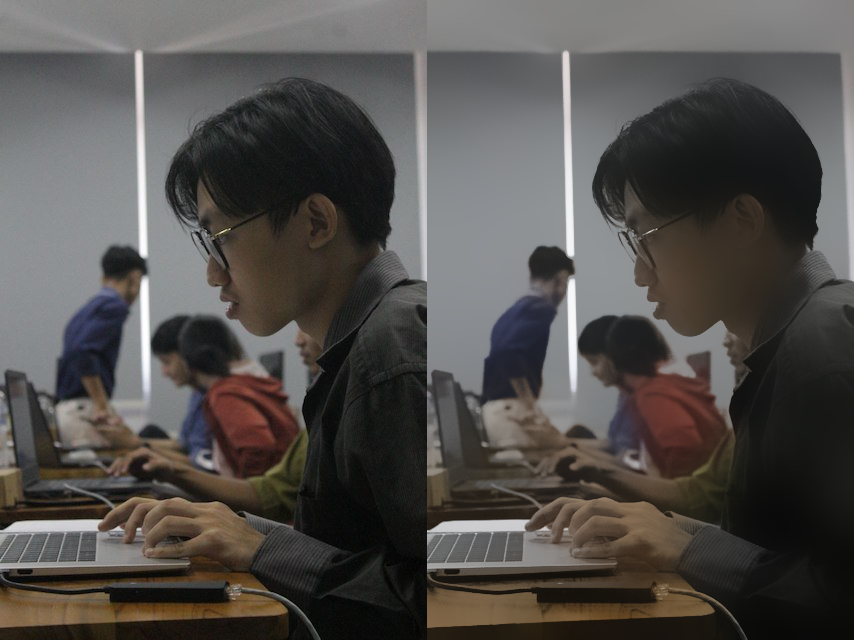

In [23]:
print("Bilateral Filter")
dst4 = cv2.bilateralFilter(src, 60, 60, 60)
cv2_imshow(np.hstack((src, dst4)))

Low Pass


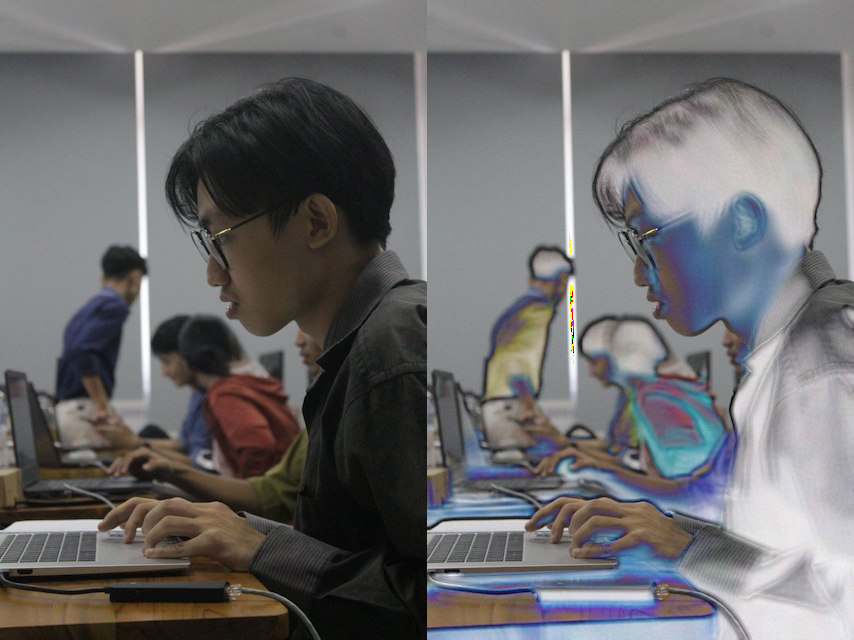

In [24]:
Lp = cv2.filter2D(src,-1, kernel)
Lp = src - Lp
print("Low Pass")
cv2_imshow(np.hstack((src, Lp)))

High Pass


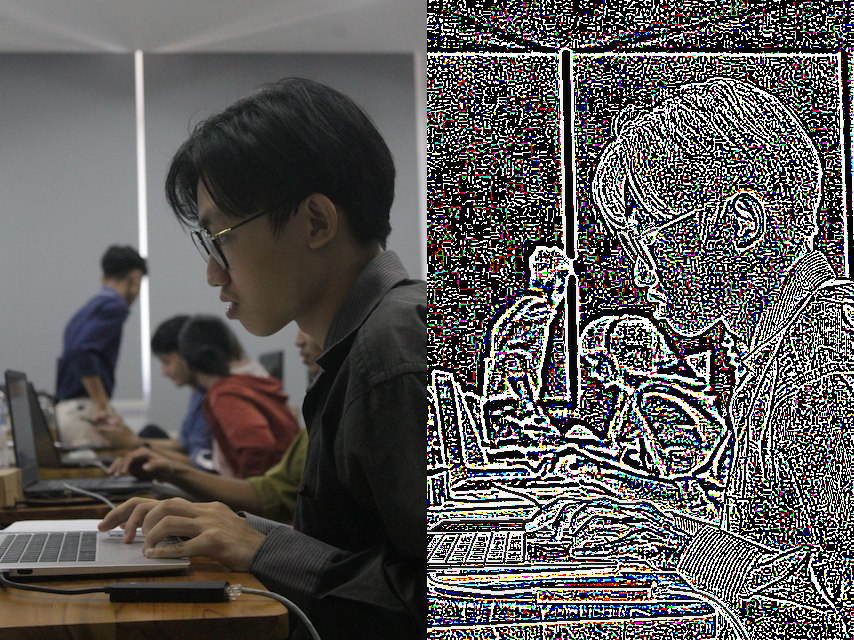

In [25]:
Hp = src - dst
filtered = Hp + 127*np.ones(src.shape, np.uint8)
print("High Pass")
cv2_imshow(np.hstack((src, Hp)))